<Figure size 2000x800 with 0 Axes>

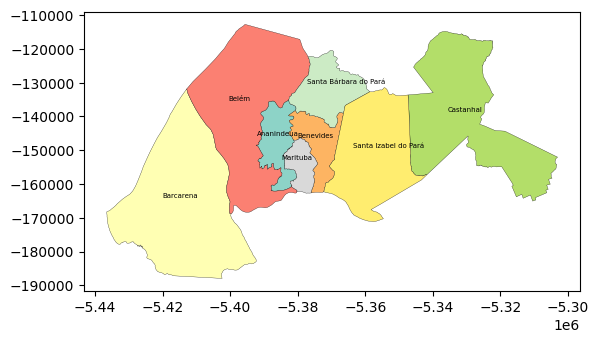

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# URL do GeoJSON dos limites dos municípios do Pará no repositório do IBGE
url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/UFs/PA/PA_Municipios_2022.zip"

# Carregar os limites dos municípios do GeoJSON
municipios = gpd.read_file(url)

# Reprojetar as geometrias para um sistema de coordenadas projetadas
municipios = municipios.to_crs('EPSG:3395')  # Por exemplo, uso do sistema de coordenadas Mercator

# Selecionar apenas alguns municípios pelo código IBGE
municipios_selecionados = municipios.query('CD_MUN == "1506500" or CD_MUN == "1506351" or CD_MUN == "1502400" or CD_MUN == "1501501" or CD_MUN == "1500800" or CD_MUN == "1504422" or CD_MUN == "1501402" or CD_MUN == "1501303"    ')

plt.figure(figsize=(20, 8))

# Plotar o mapa dos municípios
ax = municipios_selecionados.plot(legend=True, cmap='Set3', edgecolor='black', linewidth=0.2)

# Definir um fator de ajuste para evitar sobreposição de anotações
ajuste_x = 600
ajuste_y = 600

# Adicionar o nome de cada município como anotação
for geom, label in zip(municipios_selecionados.geometry, municipios_selecionados['NM_MUN']):
    # Calcular o ponto médio da geometria como posição para a anotação
    x, y = geom.centroid.x, geom.centroid.y
    # Verificar se a anotação se sobrepõe com outras
    for index, row in municipios_selecionados.iterrows():
        if row['geometry'].intersects(Point(x, y)):
            # Se a anotação se sobrepõe, ajustar sua posição
            x += ajuste_x
            y += ajuste_y
    # Adicionar a anotação
    ax.annotate(label, xy=(x, y), xytext=(-16, 3), textcoords="offset points", fontsize=5)

plt.savefig('mapa_municipios.png', dpi=600)  # Salva a imagem como 'mapa_municipios.png' com uma resolução de 300 DPI
plt.show()
